In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.manifold import TSNE

In [86]:
df = pd.read_csv('SBAnational.csv')
df_copy = df.copy()

In [87]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120.0,28-Feb-97,1997.0,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410.0,28-Feb-97,1997.0,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210.0,28-Feb-97,1997.0,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0.0,28-Feb-97,1997.0,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0.0,28-Feb-97,1997.0,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [88]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     12
City                     11
State                     4
Zip                       0
Bank                    226
BankState               228
NAICS                     1
ApprovalDate              1
ApprovalFY                1
Term                      1
NoEmp                     1
NewExist                  1
CreateJob                 1
RetainedJob               1
FranchiseCode             1
UrbanRural                1
RevLineCr                50
LowDoc                  802
ChgOffDate           227557
DisbursementDate        750
DisbursementGross         1
BalanceGross              1
MIS_Status             1203
ChgOffPrinGr              1
GrAppv                    1
SBA_Appv                  1
dtype: int64

In [89]:
df.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr',
                  'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
df.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           225558
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [90]:
df = df.drop(columns=['ChgOffDate'], axis=1)

In [91]:
c_dollar = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[c_dollar] = df[c_dollar].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))
df[c_dollar].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.00,0.00,0.00,60000.00,48000.00
1,40000.00,0.00,0.00,40000.00,32000.00
2,287000.00,0.00,0.00,287000.00,215250.00
3,35000.00,0.00,0.00,35000.00,28000.00
4,229000.00,0.00,0.00,229000.00,229000.00


In [92]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                float64
ApprovalDate          object
ApprovalFY           float64
Term                 float64
NoEmp                float64
NewExist             float64
CreateJob            float64
RetainedJob          float64
FranchiseCode        float64
UrbanRural           float64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [93]:
df[c_dollar].astype('float')

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0
...,...,...,...,...,...
326726,314500.0,0.0,184761.0,314500.0,235875.0
326727,495000.0,0.0,0.0,495000.0,371250.0
326728,522718.0,0.0,0.0,350000.0,175000.0
326729,297500.0,0.0,0.0,297500.0,223125.0


In [94]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120.0,28-Feb-97,1997.0,...,0.0,N,Y,28-Feb-99,60000.00,0.00,P I F,0.00,60000.00,48000.00
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410.0,28-Feb-97,1997.0,...,0.0,N,Y,31-May-97,40000.00,0.00,P I F,0.00,40000.00,32000.00
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210.0,28-Feb-97,1997.0,...,0.0,N,N,31-Dec-97,287000.00,0.00,P I F,0.00,287000.00,215250.00
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0.0,28-Feb-97,1997.0,...,0.0,N,Y,30-Jun-97,35000.00,0.00,P I F,0.00,35000.00,28000.00
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0.0,28-Feb-97,1997.0,...,0.0,N,N,14-May-97,229000.00,0.00,P I F,0.00,229000.00,229000.00


In [95]:
df['ApprovalDate'].unique()

array(['28-Feb-97', '2-Jun-80', '7-Feb-06', ..., '5-Jul-88', '12-Nov-08',
       '6-Jul-88'], dtype=object)

In [96]:
df['ApprovalDate'] = df['ApprovalDate'].astype(str)
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'])

In [97]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120.0,1997-02-28,1997.0,...,0.0,N,Y,28-Feb-99,60000.00,0.00,P I F,0.00,60000.00,48000.00
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410.0,1997-02-28,1997.0,...,0.0,N,Y,31-May-97,40000.00,0.00,P I F,0.00,40000.00,32000.00
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210.0,1997-02-28,1997.0,...,0.0,N,N,31-Dec-97,287000.00,0.00,P I F,0.00,287000.00,215250.00
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0.0,1997-02-28,1997.0,...,0.0,N,Y,30-Jun-97,35000.00,0.00,P I F,0.00,35000.00,28000.00
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0.0,1997-02-28,1997.0,...,0.0,N,N,14-May-97,229000.00,0.00,P I F,0.00,229000.00,229000.00


In [98]:
df.ApprovalFY.unique()

array([1997., 1980., 2006., 1998., 1999., 2000., 2001., 1972., 2003.,
       2004., 1978., 1979., 1981., 2005., 1982., 1983., 1973., 1984.,
       2007., 1985., 1986., 1987., 2008., 1988., 2009., 1989.])

In [99]:
df.loc[df['ApprovalFY'] == '1976A', 'ApprovalFY'] = '1976'

In [100]:
df['ApprovalFY'] = df['ApprovalFY'].astype(int)

In [101]:
df.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                       float64
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                        float64
NoEmp                       float64
NewExist                    float64
CreateJob                   float64
RetainedJob                 float64
FranchiseCode               float64
UrbanRural                  float64
RevLineCr                    object
LowDoc                       object
DisbursementDate             object
DisbursementGross            object
BalanceGross                 object
MIS_Status                   object
ChgOffPrinGr                 object
GrAppv                       object
SBA_Appv                     object
dtype: object

In [102]:
df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip',
                 'SBA_Appv', 'Bank', 'BankState', 'DisbursementGross', 
                 'BalanceGross','ChgOffPrinGr'], axis=1, inplace=True)

In [103]:
df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,GrAppv
0,IN,451120.0,1997-02-28,1997,84.0,4.0,2.0,0.0,0.0,1.0,0.0,N,Y,28-Feb-99,P I F,60000.00
1,IN,722410.0,1997-02-28,1997,60.0,2.0,2.0,0.0,0.0,1.0,0.0,N,Y,31-May-97,P I F,40000.00
2,IN,621210.0,1997-02-28,1997,180.0,7.0,1.0,0.0,0.0,1.0,0.0,N,N,31-Dec-97,P I F,287000.00
3,OK,0.0,1997-02-28,1997,60.0,2.0,1.0,0.0,0.0,1.0,0.0,N,Y,30-Jun-97,P I F,35000.00
4,FL,0.0,1997-02-28,1997,240.0,14.0,1.0,7.0,7.0,1.0,0.0,N,N,14-May-97,P I F,229000.00


In [104]:
df['NewExist'].unique()

array([2., 1., 0.])

In [105]:
df = df[~(df['NewExist'] == 0)]

In [106]:
df['IsNewBusiness'] = np.where(df['NewExist'] == 2, 1, 0)
df.drop(columns=['NewExist'], axis=1, inplace=True)

<ipython-input-106-b76b90d9468d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsNewBusiness'] = np.where(df['NewExist'] == 2, 1, 0)
<ipython-input-106-b76b90d9468d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['NewExist'], axis=1, inplace=True)


In [107]:
df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,GrAppv,IsNewBusiness
0,IN,451120.0,1997-02-28,1997,84.0,4.0,0.0,0.0,1.0,0.0,N,Y,28-Feb-99,P I F,60000.00,1
1,IN,722410.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0.0,N,Y,31-May-97,P I F,40000.00,1
2,IN,621210.0,1997-02-28,1997,180.0,7.0,0.0,0.0,1.0,0.0,N,N,31-Dec-97,P I F,287000.00,0
3,OK,0.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0.0,N,Y,30-Jun-97,P I F,35000.00,0
4,FL,0.0,1997-02-28,1997,240.0,14.0,7.0,7.0,1.0,0.0,N,N,14-May-97,P I F,229000.00,0


In [108]:
df.MIS_Status = np.where(df.MIS_Status == 'P I F', 1, 0)

In [109]:
df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,GrAppv,IsNewBusiness
0,IN,451120.0,1997-02-28,1997,84.0,4.0,0.0,0.0,1.0,0.0,N,Y,28-Feb-99,1,60000.00,1
1,IN,722410.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0.0,N,Y,31-May-97,1,40000.00,1
2,IN,621210.0,1997-02-28,1997,180.0,7.0,0.0,0.0,1.0,0.0,N,N,31-Dec-97,1,287000.00,0
3,OK,0.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0.0,N,Y,30-Jun-97,1,35000.00,0
4,FL,0.0,1997-02-28,1997,240.0,14.0,7.0,7.0,1.0,0.0,N,N,14-May-97,1,229000.00,0


In [110]:
df['UrbanRural'].unique()

array([0., 1., 2.])

In [111]:
df['UrbanRural'] = df['UrbanRural'].astype(int)

In [112]:
for x in df['UrbanRural'].unique():
    print(x, sum(df['UrbanRural'] == x))

0 95716
1 188081
2 39757


In [113]:
df['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', '`', ',', '1', 'C'], dtype=object)

In [114]:
df['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A'], dtype=object)

In [115]:
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N')] 
df = df[(df['LowDoc'] == 'Y') | (df['LowDoc'] == 'N')]

df['RevLineCr'] = np.where(df['RevLineCr'] == 'Y', 1, 0)
df['LowDoc'] = np.where(df['LowDoc'] == 'Y', 1, 0)

In [116]:
df['ApprovalDate'].dtype

dtype('<M8[ns]')

In [117]:
df['DisbursementDate'].dtype

dtype('O')

In [118]:
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])
df['DisbursementTime'] = df['DisbursementDate'] - df['ApprovalDate']
df['DisbursementTime'] = df['DisbursementTime'].astype(str)
df['DisbursementTime'] = df['DisbursementTime'].str.replace(' days', '')

In [119]:
df['DisbursementTime'].unique()

array(['730', '92', '306', ..., '1314', '1533', '-12'], dtype=object)

In [120]:
df['DisbursementTime'] = df['DisbursementTime'].astype(int)

In [121]:
df['DisbursementTime'].describe()

count    237066.000000
mean        103.745721
std         283.019441
min      -36409.000000
25%          24.000000
50%          42.000000
75%          95.000000
max       24132.000000
Name: DisbursementTime, dtype: float64

In [122]:
sum(df['DisbursementTime'] < 0)

73

In [123]:
df = df[~(df['DisbursementTime'] < 0)]

In [124]:
df.head()

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,GrAppv,IsNewBusiness,DisbursementTime
0,IN,451120.0,1997-02-28,1997,84.0,4.0,0.0,0.0,1.0,0,0,1,1999-02-28,1,60000.00,1,730
1,IN,722410.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0,0,1,1997-05-31,1,40000.00,1,92
2,IN,621210.0,1997-02-28,1997,180.0,7.0,0.0,0.0,1.0,0,0,0,1997-12-31,1,287000.00,0,306
3,OK,0.0,1997-02-28,1997,60.0,2.0,0.0,0.0,1.0,0,0,1,1997-06-30,1,35000.00,0,122
4,FL,0.0,1997-02-28,1997,240.0,14.0,7.0,7.0,1.0,0,0,0,1997-05-14,1,229000.00,0,75


In [125]:
df.drop(columns=['State', 'ApprovalDate', 'DisbursementDate'], inplace=True, axis=1)

<ipython-input-125-243f40362e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['State', 'ApprovalDate', 'DisbursementDate'], inplace=True, axis=1)


In [126]:
df['FranchiseCode'].describe()

count    236993.000000
mean       1250.410109
std        8722.460589
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       99999.000000
Name: FranchiseCode, dtype: float64

In [127]:
df.loc[(df['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'IsFranchise'] = 1

df['IsFranchise'] = df['IsFranchise'].astype(int)
df.drop(columns=['FranchiseCode'], axis=1, inplace=True)

In [128]:
df['NAICS'].unique()

array([451120., 722410., 621210., ..., 441228., 111335., 331112.])

In [129]:
df.drop(columns=['NAICS'], inplace=True)

In [130]:
df.dtypes


ApprovalFY            int64
Term                float64
NoEmp               float64
CreateJob           float64
RetainedJob         float64
UrbanRural            int64
RevLineCr             int64
LowDoc                int64
MIS_Status            int64
GrAppv               object
IsNewBusiness         int64
DisbursementTime      int64
IsFranchise           int64
dtype: object

In [131]:
df['GrAppv'] = df['GrAppv'].astype(float)

In [132]:
df.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,IsNewBusiness,DisbursementTime,IsFranchise
0,1997,84.0,4.0,0.0,0.0,0,0,1,1,60000.0,1,730,0
1,1997,60.0,2.0,0.0,0.0,0,0,1,1,40000.0,1,92,0
2,1997,180.0,7.0,0.0,0.0,0,0,0,1,287000.0,0,306,0
3,1997,60.0,2.0,0.0,0.0,0,0,1,1,35000.0,0,122,0
4,1997,240.0,14.0,7.0,7.0,0,0,0,1,229000.0,0,75,0


In [133]:
df.UrbanRural.unique()

array([0, 1, 2])

In [134]:
df.UrbanRural.dtypes

dtype('int64')

In [135]:
df['RevLineCr'].unique()

array([0, 1])

In [136]:
df = pd.get_dummies(df, columns=['UrbanRural'])
df.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,MIS_Status,GrAppv,IsNewBusiness,DisbursementTime,IsFranchise,UrbanRural_0,UrbanRural_1,UrbanRural_2
0,1997,84.0,4.0,0.0,0.0,0,1,1,60000.0,1,730,0,1,0,0
1,1997,60.0,2.0,0.0,0.0,0,1,1,40000.0,1,92,0,1,0,0
2,1997,180.0,7.0,0.0,0.0,0,0,1,287000.0,0,306,0,1,0,0
3,1997,60.0,2.0,0.0,0.0,0,1,1,35000.0,0,122,0,1,0,0
4,1997,240.0,14.0,7.0,7.0,0,0,1,229000.0,0,75,0,1,0,0


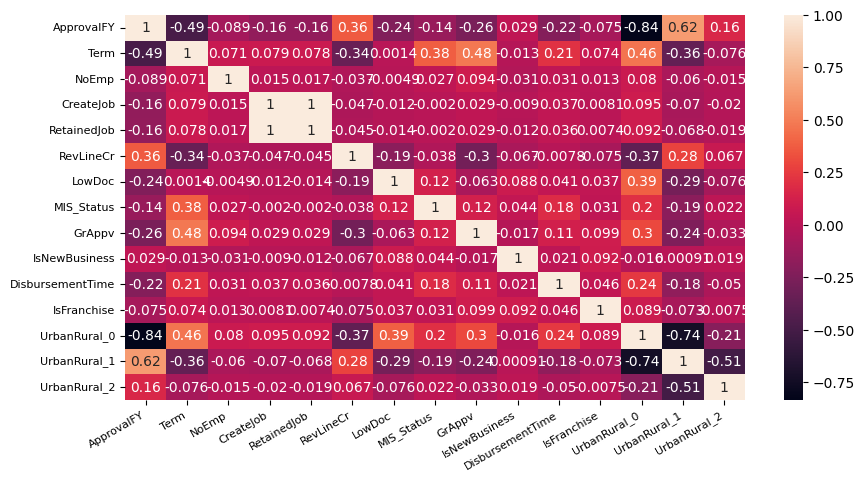

In [137]:
cor_fig, cor_ax = plt.subplots(figsize=(10, 5))
corr_matrix = df.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [138]:
df.drop(labels='UrbanRural_2', axis=1, inplace=True)

In [139]:
df.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,MIS_Status,GrAppv,IsNewBusiness,DisbursementTime,IsFranchise,UrbanRural_0,UrbanRural_1
0,1997,84.0,4.0,0.0,0.0,0,1,1,60000.0,1,730,0,1,0
1,1997,60.0,2.0,0.0,0.0,0,1,1,40000.0,1,92,0,1,0
2,1997,180.0,7.0,0.0,0.0,0,0,1,287000.0,0,306,0,1,0
3,1997,60.0,2.0,0.0,0.0,0,1,1,35000.0,0,122,0,1,0
4,1997,240.0,14.0,7.0,7.0,0,0,1,229000.0,0,75,0,1,0


In [140]:
X = df.drop(columns='MIS_Status', axis=1)
y = df['MIS_Status']

scale = StandardScaler()
X_s = scale.fit_transform(X)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.3)

In [142]:
print(X_train.shape, X_test.shape)

(165895, 13) (71098, 13)


In [143]:
lr = LogisticRegression(penalty="none", 
                        max_iter=10000,
                        random_state=123)

lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

print(classification_report(y_test, y_lr_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.57      0.64     23605
           1       0.81      0.89      0.85     47493

    accuracy                           0.78     71098
   macro avg       0.76      0.73      0.74     71098
weighted avg       0.78      0.78      0.78     71098



In [144]:
lr2 = LogisticRegression(penalty='l2', 
                        max_iter=10000,
                        random_state=123)

lr2.fit(X_train, y_train)
y_lr2_pred = lr2.predict(X_test)

print(classification_report(y_test, y_lr2_pred))

              precision    recall  f1-score   support

           0       0.72      0.57      0.64     23605
           1       0.81      0.89      0.85     47493

    accuracy                           0.78     71098
   macro avg       0.76      0.73      0.74     71098
weighted avg       0.78      0.78      0.78     71098



In [147]:
X_train.shape

(165895, 13)

In [148]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

X_test_pca.shape

(71098, 2)

In [149]:
X_test_pca[:,0]

array([ 4.77155005,  2.9250811 ,  4.25592768, ...,  2.73468089,
       -1.68559337, -1.42663979])

In [150]:
y_test

130649    1
122732    1
32248     1
156223    1
214905    0
         ..
217884    1
16957     1
318742    1
276424    0
196393    1
Name: MIS_Status, Length: 71098, dtype: int64

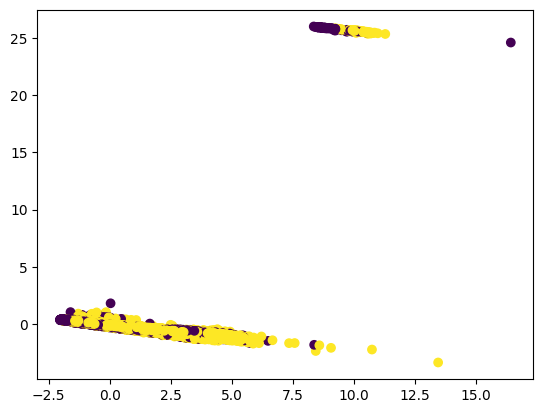

In [151]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test)

In [152]:
pca_2d_points_train = list(zip(X_train_pca[:,0], X_train_pca[:,1]))
pca_2d_points_test = list(zip(X_test_pca[:,0], X_test_pca[:,1]))

In [153]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(pca_2d_points_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [154]:
knn.score(pca_2d_points_test, y_test)

0.7200343188275339

In [155]:
knn2_pca = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15)}
knn2_pca_gscv = GridSearchCV(knn2_pca, param_grid, cv=10)
knn2_pca_gscv.fit(pca_2d_points_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [158]:
knn2_pca_best_n = [*knn2_pca_gscv.best_params_.values()][0]
knn2_pca_best_n

13

In [160]:
knn_pca_best = KNeighborsClassifier(n_neighbors=knn2_pca_best_n)
knn_pca_best.fit(pca_2d_points_train, y_train)
knn_pca_best.score(pca_2d_points_test, y_test)

0.76251090044727

In [161]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15)}
knn2_gscv = GridSearchCV(knn2, param_grid, cv=10)
knn2_gscv.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
knn2_best_n = [*knn2_gscv.best_params_.values()][0]
knn2_best_n

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=knn2_best_n)

knn_best.fit(X_train, y_train)

In [ ]:
knn_best.score(X_test, y_test)

In [ ]:
lr_pca = LogisticRegression(penalty='none',
                            max_iter=10000,
                            random_state=123)

lr_pca.fit(X_train_pca, y_train)
y_pca_pred = lr_pca.predict(X_test_pca)

print(classification_report(y_test, y_pca_pred))

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

In [ ]:
lr_tsne = LogisticRegression(penalty='none',
                            max_iter=10000,
                            random_state=123)
lr_tsne.fit(X_train_tsne, y_train)
y_tsne_pred = lr_tsne.predict(X_test_tsne)

print(classification_report(y_test, y_tsne_pred))

In [ ]:
imp = lr.coef_[0]

for i,v in enumerate(imp):
    print(f'{df.columns[i]:16}: {v}')

In [ ]:
xgb = XGBClassifier(random_state=123)

xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)

print(classification_report(y_test, y_xgb_pred, digits=3))

In [ ]:
for col, imp in sorted(zip(df.drop(columns='MIS_Status', index=1).columns,
                            xgb.feature_importances_), 
                            key=lambda x: x[1], reverse=True):
    
    print(f'{col:16} : {imp:.2f}')

In [ ]:
for col, imp in zip(df.drop(columns='MIS_Status', index=1).columns,
                            xgb.feature_importances_):
    
    print(f'{col:16} : {imp:.2f}')

In [ ]:
X_train2 = np.delete(X_train, [2,10,11], 1)
X_test2 = np.delete(X_test, [2,10,11], 1)

In [ ]:
xgb2 = XGBClassifier(random_state=123)

xgb2.fit(X_train2, y_train)
y_xgb2_pred = xgb2.predict(X_test2)

print(classification_report(y_test, y_xgb2_pred, digits=3))

In [ ]:
print(confusion_matrix(y_test, y_xgb2_pred))

In [ ]:
m_svm = svm.LinearSVC()
m_svm.fit(X_train2, y_train)
y_svm_pred = m_svm.predict(X_test2)

print(classification_report(y_svm_pred, y_test, digits=3))